In [44]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
data = pd.read_csv(r'data\2025\export2025.08.19-06.06.39.csv', encoding='utf-8')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          127 non-null    object 
 1   Authors                 120 non-null    object 
 2   Author Affiliations     120 non-null    object 
 3   Publication Title       127 non-null    object 
 4   Date Added To Xplore    127 non-null    object 
 5   Publication Year        127 non-null    int64  
 6   Volume                  127 non-null    int64  
 7   Issue                   127 non-null    int64  
 8   Start Page              127 non-null    object 
 9   End Page                127 non-null    object 
 10  Abstract                120 non-null    object 
 11  ISSN                    127 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     127 non-null    object 
 14  Funding Information     105 non-null    ob

In [46]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          127 non-null    object 
 1   Authors                 120 non-null    object 
 2   Author Affiliations     120 non-null    object 
 3   Publication Title       127 non-null    object 
 4   Date Added To Xplore    127 non-null    object 
 5   Publication Year        127 non-null    int64  
 6   Volume                  127 non-null    int64  
 7   Issue                   127 non-null    int64  
 8   Start Page              127 non-null    object 
 9   End Page                127 non-null    object 
 10  Abstract                120 non-null    object 
 11  ISSN                    127 non-null    object 
 12  DOI                     127 non-null    object 
 13  Funding Information     105 non-null    object 
 14  PDF Link                127 non-null    ob

In [47]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              120 non-null    object
 1   Author Affiliations  120 non-null    object
 2   Publication Year     127 non-null    int64 
 3   Funding Information  105 non-null    object
 4   Author Keywords      120 non-null    object
 5   IEEE Terms           120 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.1+ KB


In [48]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.to_csv('august.csv', encoding='utf-8', index=False)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              120 non-null    object
 1   Author Affiliations  120 non-null    object
 2   Publication Year     120 non-null    int64 
 3   Funding Information  105 non-null    object
 4   Author Keywords      120 non-null    object
 5   IEEE Terms           120 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.8+ KB


In [49]:
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,E. Baldazzi; R. Cicchetti; A. Faraone; L. Foge...,"Department of Information Engineering, Electro...",2025,NaN,Dielectric lens;dielectric resonator antennas ...,Lenses;Dielectrics;Permittivity;Tensors;Period...
1,H. -T. Chou; Y. -M. Chen; C. -Y. Lee,Graduate Institute of Communication Engineerin...,2025,"National Science and Technology Council, Taiwan;",Antenna array;antenna-in-package (AiP);dual-po...,Antenna arrays;Radio frequency;Metals;Antennas...
2,S. P. Hehenberger; S. Caizzone; A. Yarovoy,German Aerospace Center Institute of Communica...,2025,NaN,Additive manufacturing (AM);antenna;bandgap;di...,Dielectrics;Photonic band gap;Antennas;Permitt...
3,Z. Liu; P. F. Hu; Y. M. Pan; K. W. Leung; S. Y...,School of Electronics and Information Technolo...,2025,Fundamental Research Funds for the Central Uni...,Dielectric resonator antenna (DRA);in-band ful...,Antenna radiation patterns;Probes;Substrates;A...
4,M. Arias Campo; S. Bruni; A. Lauer; M. Wleklin...,"Department of Antennas and EM Modeling, IMST G...",2025,Federal Ministry of Education and Research of ...,6G;beamforming;communications;focal-planar arr...,Lenses;Feeds;Phased arrays;Prototypes;Dielectr...


In [50]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        countries.append(aff.split(', ')[-1])

In [53]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace("Republic of Korea", "South Korea")
countries = countries.replace("United Arab Emirates", "UAE")
counts = countries.value_counts()
labels = list(counts.keys())
values = list(counts.values)

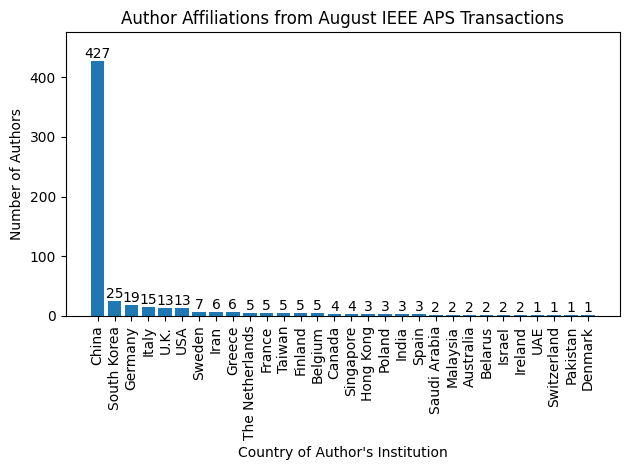

In [54]:
fig, ax = plt.subplots()
bar_cont = ax.bar(labels, values)
ax.set(ylim=(0, 475))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title('Author Affiliations from August IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
# plt.savefig('authors_by_country.png')
plt.show()